<a href="https://colab.research.google.com/github/AuliaVirza101/PCVK/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


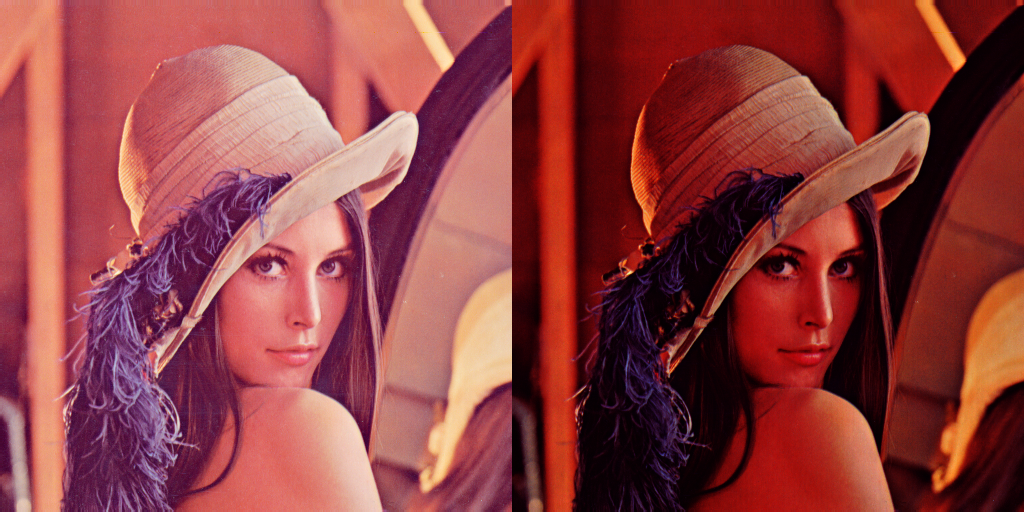

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Membaca gambar
img = cv.imread("drive/MyDrive/PCVK_2024/lena.png")

# Normalisasi nilai intensitas dari 0-255 ke 0-1
img_gamma = np.power(img/255,gamma) * 255

img_result = cv.hconcat([img, img_gamma.astype(np.uint8)])

cv2_imshow(img_result)




2. Bit depth

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

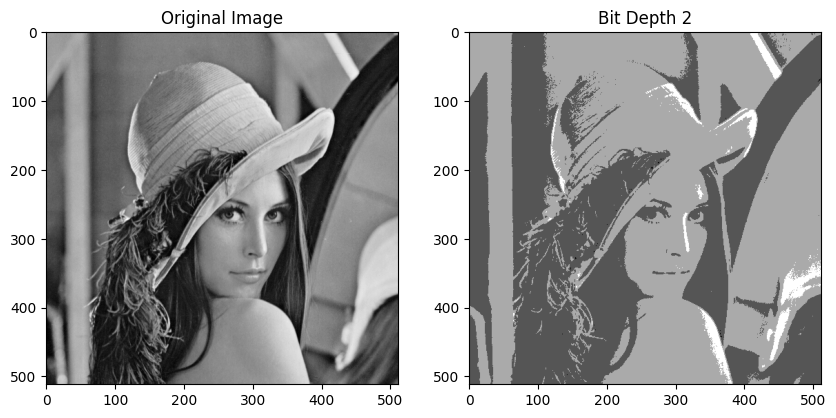

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Nilai kedalaman bit
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('drive/MyDrive/PCVK_2024/lena.png', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Menghitung nilai piksel baru berdasarkan kedalaman bit
depth_image = np.round(original / level) * level
depth_image = np.uint8(depth_image)

# Menampilkan gambar asli dan hasil reduksi kedalaman bit
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Bit Depth {bit_depth}')

plt.show()


Average denoising  and PNSR

PSNR Average 5 Image:  27.53913189244123
PSNR Average 10 Image:  27.556443657166447
PSNR Average 20 Image:  27.5188002701703
PSNR Average 40 Image:  27.457069133128282
PSNR Average 80 Image:  27.399852250338785
PSNR Average 100 Image:  27.370931279516654


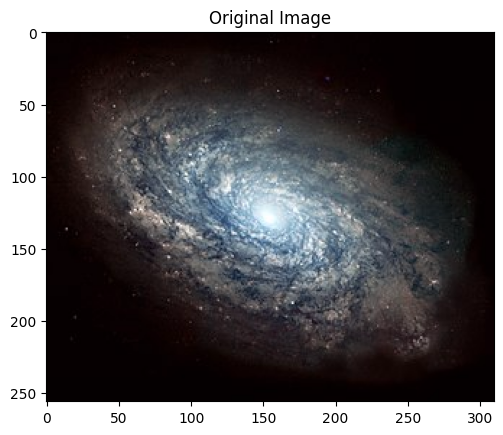

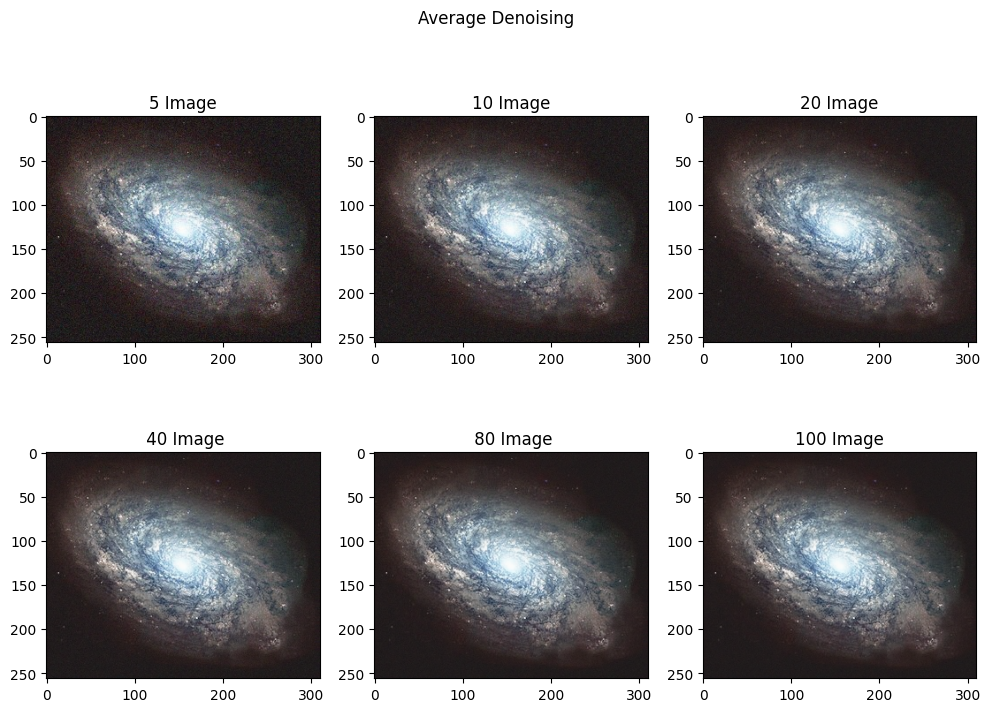

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load all images from the specified directory
original = cv2.imread('drive/MyDrive/PCVK_2024/galaxy.jpg')

cv_img = []
for img in glob.glob('drive/MyDrive/noises/*.jpg'):
    n = cv2.imread(img)
    if n is not None:
        cv_img.append(n)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE 0 means no noise, so PSNR is not defined
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def average_denoising(images, jumlah_citra):
    sum_image = np.zeros(images[0].shape, np.float64)
    for i in range(jumlah_citra):
        sum_image = sum_image + images[i]
    average_image = sum_image / jumlah_citra
    return np.clip(average_image, 0, 255).astype(np.uint8)

plt.title('Original Image')
plt.imshow(original)

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Average Denoising')

avg05 = average_denoising(cv_img, 5)
ax[0, 0].imshow(avg05)
ax[0, 0].set_title('5 Image')

avg10 = average_denoising(cv_img, 10)
ax[0, 1].imshow(avg10)
ax[0, 1].set_title('10 Image')

avg20 = average_denoising(cv_img, 20)
ax[0, 2].imshow(avg20)
ax[0, 2].set_title('20 Image')

avg40 = average_denoising(cv_img, 40)
ax[1, 0].imshow(avg40)
ax[1, 0].set_title(' 40 Image')

avg80 = average_denoising(cv_img, 80)
ax[1, 1].imshow(avg80)
ax[1, 1].set_title(' 80 Image')

avg100 = average_denoising(cv_img, 100)
ax[1, 2].imshow(avg100)
ax[1, 2].set_title('100 Image')

psnr05 = PSNR(original, avg05)
psnr10 = PSNR(original, avg10)
psnr20 = PSNR(original, avg20)
psnr40 = PSNR(original, avg40)
psnr80 = PSNR(original, avg80)
psnr100 = PSNR(original, avg100)
print('PSNR Average 5 Image: ', psnr05)
print('PSNR Average 10 Image: ', psnr10)
print('PSNR Average 20 Image: ', psnr20)
print('PSNR Average 40 Image: ', psnr40)
print('PSNR Average 80 Image: ', psnr80)
print('PSNR Average 100 Image: ', psnr100)







The average denoising method is highly effective in reducing noise in images, especially when a sufficient number of images are averaged. However, after reaching a certain number of images, the improvement in image quality becomes progressively smaller, indicating diminishing returns. Therefore, it is important to find a balance between the number of images averaged and the desired quality improvement.

4.Masking

**AND**

Text(0.5, 1.0, 'Citra Masking')

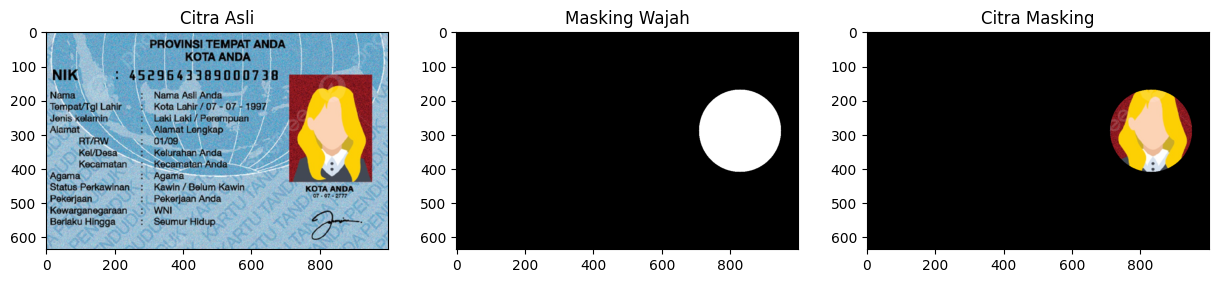

In [46]:
import cv2 as cv
import matplotlib.pyplot as plt
ktp = cv2.imread('drive/MyDrive/PCVK_2024/KTP.jpg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (830, 290), 120, 255, -1)

masked_image_face = cv.bitwise_and(ktp, ktp, mask=mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(masked_image_face)
ax[2].set_title('Citra Masking')

**NOT**

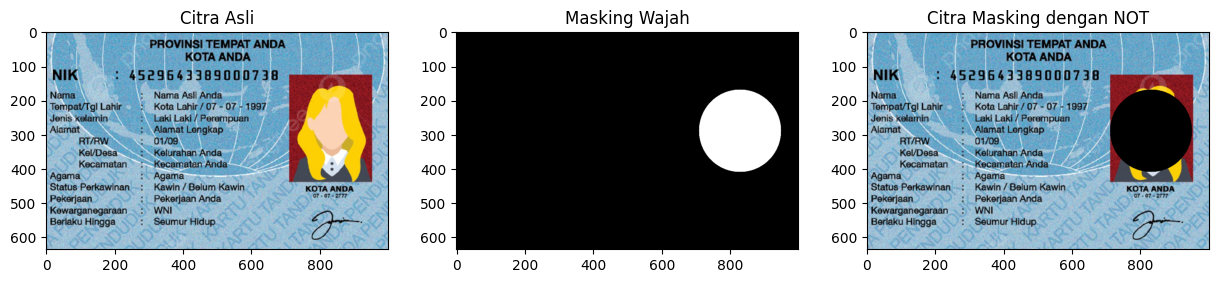

In [36]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (830, 290), 120, 255, -1)

mask_not = cv.bitwise_not(mask)
masked_image_not_face = cv.bitwise_and(ktp, ktp, mask=mask_not)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(masked_image_not_face)
ax[2].set_title('Citra Masking dengan NOT')

plt.show()

**OR**

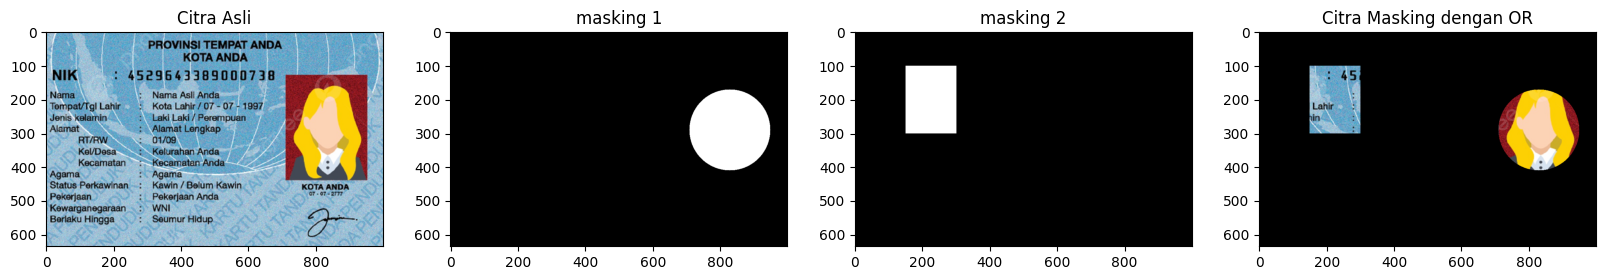

In [41]:

mask1 = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask1, (830, 290), 120, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)
mask2 = np.zeros(ktp.shape[:2], dtype="uint8")
cv.rectangle(mask2, (150, 100), (300, 300), 255, -1)  # Masking area lain (sesuaikan)


mask = cv.bitwise_or(mask1, mask2)
masked_image = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask1, cmap='gray')
ax[1].set_title('masking 1')

ax[2].imshow(mask2, cmap='gray')
ax[2].set_title('masking 2')

ax[3].imshow(masked_image)
ax[3].set_title('Citra Masking dengan OR')

plt.show()

**NAND**

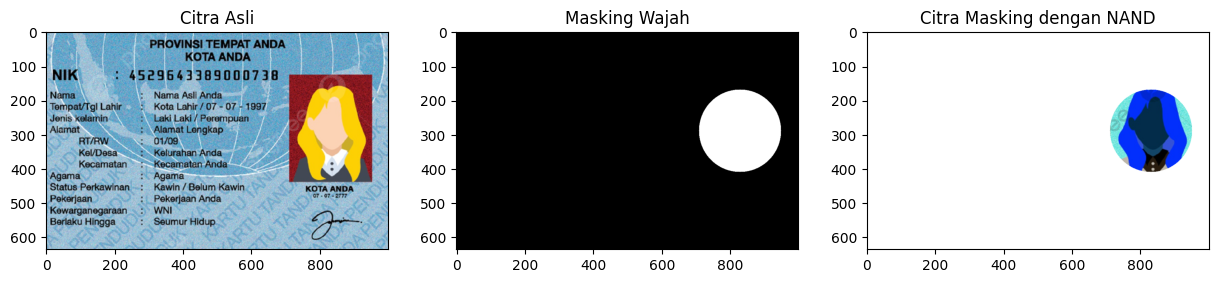

In [47]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (830, 290), 120, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Menerapkan AND pada gambar (masking wajah)
masked_image = cv.bitwise_and(ktp, ktp, mask=mask)
# Membalik hasil AND dengan operator NOT (NAND)
nand_masked_image = cv.bitwise_not(masked_image)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(nand_masked_image)
ax[2].set_title('Citra Masking dengan NAND')

plt.show()


**XOR**

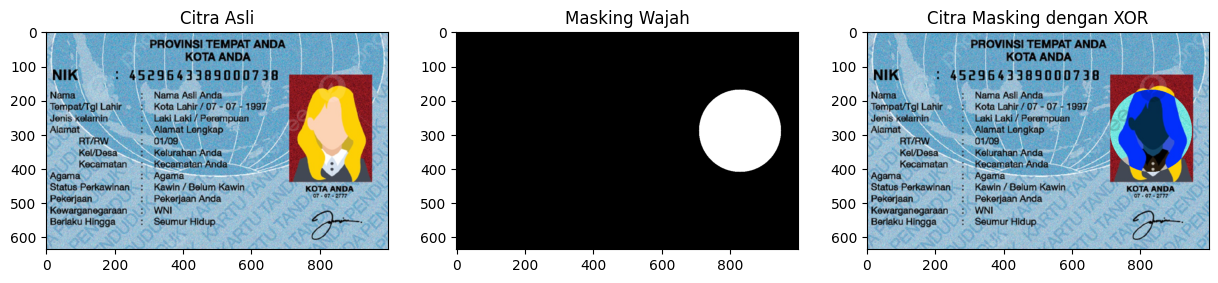

In [48]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (830, 290), 120, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Mengubah mask menjadi tiga channel
mask_colored = cv.merge([mask, mask, mask])  # Mengulang mask ke tiga channel
# Melakukan operasi XOR antara gambar dan mask
xor_masked_image = cv.bitwise_xor(ktp, mask_colored)

# Menampilkan hasil
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(xor_masked_image)
ax[2].set_title('Citra Masking dengan XOR')

plt.show()

Overview

NOT Function: The NOT operator inverts pixel values. If a pixel has a value of
0 (black), it becomes 255 (white), and vice versa.

AND Function: The AND operator returns the same pixel value if both images have non-zero pixel values. If one or both pixels are 0, the result is 0.

OR Function: The OR operator returns a non-zero pixel if either of the two input pixels is non-zero.

NAND Function: The NAND operator returns the inverse of AND. The result is 0 only if both pixels are 1.

XOR Function: The XOR operator returns a value of 1 if the two pixels are different (one is 1 and the other is 0), but returns 0 if they are the same.